In [27]:
from __future__ import annotations

import argparse
import json
import logging
import random
from dataclasses import asdict, dataclass
from pathlib import Path
from typing import Dict, Tuple

import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader

from src.dataio.datasets import SleepStageDataset
from src.models.basic_cnn import SmallCNN
from src.models.cnn_bilstm import CNNBiLSTM
from src.models.implicit_cnn import ImplicitFrequencyCNN
from src.utils.hardware_utils import resolve_device

from train import TrainConfig

import matplotlib.pyplot as plt

In [10]:
config = TrainConfig(
        train_data="data/toy_data_train.npz",
        val_data="data/toy_data_train.npz",
        output_dir=Path("artifacts"),
        epochs=5,
        batch_size=32,
 )

In [11]:
asdict(config)

{'train_data': 'data/toy_data_train.npz',
 'val_data': 'data/toy_data_train.npz',
 'output_dir': PosixPath('artifacts'),
 'epochs': 5,
 'batch_size': 32,
 'learning_rate': 0.0003,
 'weight_decay': 0.0001,
 'grad_clip': 1.0,
 'num_workers': 0,
 'device': 'auto',
 'seed': 42,
 'log_interval': 25,
 'checkpoint_name': 'best.pt',
 'model_type': 'small_cnn'}

In [12]:
device = resolve_device(config.device)

NameError: name 'self' is not defined

In [13]:
train_ds = SleepStageDataset(config.train_data)
val_ds = SleepStageDataset(config.val_data)

In [20]:
train_ds.__getitem__(0)[0]

tensor([[-2.4033e-05, -2.7543e-05, -3.3036e-05,  ..., -1.2970e-06,
          5.1118e-06,  6.0273e-06],
        [ 1.9913e-05, -6.6377e-06, -1.8082e-05,  ..., -1.9150e-05,
         -9.8421e-06,  3.4333e-06]])

In [25]:
val_ds.__getitem__(0)[0][1].mean()

tensor(-2.6480e-07)

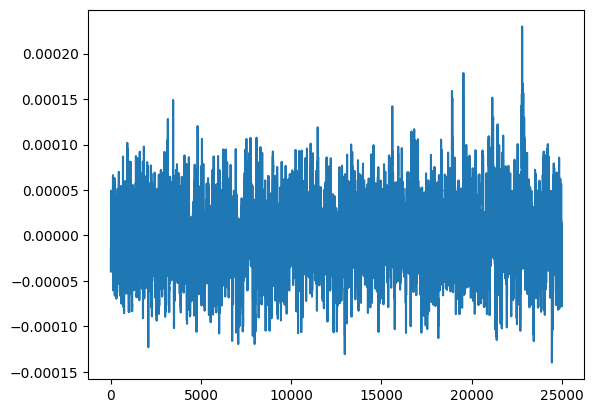

In [37]:
plt.plot(val_ds.__getitem__(500)[0][0].numpy().T)